In [ ]:
pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Load your dataset from a CSV file
# Replace 'your_dataset.csv' with the actual path to your dataset file
data = pd.read_csv('pipe leak-dataset.csv')

# Define the Bayesian network structure
model = BayesianNetwork([('PS1', 'Leak'), ('PS2', 'Leak')])

# Calculate the CPD for Pressure Sensor 1 (PS1)
cpd_ps1 = TabularCPD(variable='PS1', variable_card=3, values=[data['pressure sensor 1'].value_counts(normalize=True).sort_index().tolist()],
                     state_names={'PS1': sorted(data['pressure sensor 1'].unique())}).values

# Calculate the CPD for Pressure Sensor 2 (PS2)
cpd_ps2 = TabularCPD(variable='PS2', variable_card=3, values=[data['pressure sensor 2'].value_counts(normalize=True).sort_index().tolist()],
                     state_names={'PS2': sorted(data['pressure sensor 2'].unique())}).values

# Calculate the CPD for Pipe Leak (Leak) given PS1 and PS2
cpd_leak = TabularCPD(variable='Leak', variable_card=2,
                      values=[data.groupby(['pressure sensor 1', 'pressure sensor 2'])['Label'].value_counts(normalize=True).sort_index().tolist()],
                      evidence=['PS1', 'PS2'], evidence_card=[3, 3],
                      state_names={'Leak': sorted(data['Label'].unique()),
                                   'PS1': sorted(data['pressure sensor 1'].unique()),
                                   'PS2': sorted(data['pressure sensor 2'].unique())})

# Add CPDs to the model
model.add_cpds(cpd_ps1, cpd_ps2, cpd_leak)

# Verify the model
assert model.check_model()

# Perform variable elimination for inference
inference = VariableElimination(model)

# Query the probability of Pipe Leak given specific sensor readings
result = inference.query(variables=['Leak'], evidence={'PS1': 'Low', 'PS2': 'Normal'})
print(result)

# Print the marginal probability of Pipe Leak
print(result.values[0])


ValueError: ignored

In [ ]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Load your dataset from a CSV file
# Replace 'your_dataset.csv' with the actual path to your dataset file
data = pd.read_csv('pipe leak-dataset.csv')

# Define the Bayesian network structure
model = BayesianNetwork([('PS1', 'Leak'), ('PS2', 'Leak')])

# Calculate the CPD for Pressure Sensor 1 (PS1)
unique_ps1_values = sorted(data['PS1'].unique())
cpd_ps1 = TabularCPD(variable='PS1', variable_card=3, values=[[0.0], [0.0], [0.0]],
                     state_names={'PS1': unique_ps1_values})

for value in unique_ps1_values:
    count = len(data[data['PS1'] == value])
    cpd_ps1.values[unique_ps1_values.index(value), 0] = count / len(data)

# Calculate the CPD for Pressure Sensor 2 (PS2)
unique_ps2_values = sorted(data['PS2'].unique())
cpd_ps2 = TabularCPD(variable='PS2', variable_card=3, values=[[0.0], [0.0], [0.0]],
                     state_names={'PS2': unique_ps2_values})

for value in unique_ps2_values:
    count = len(data[data['PS2'] == value])
    cpd_ps2.values[unique_ps2_values.index(value), 0] = count / len(data)

# Calculate the CPD for Pipe Leak (Leak) given PS1 and PS2
# This example assumes that Leak is binary (0 or 1)
cpd_leak = TabularCPD(variable='Leak', variable_card=2,
                      values=[data.groupby(['PS1', 'PS2'])['Leak'].value_counts(normalize=True).sort_index().tolist()],
                      evidence=['PS1', 'PS2'], evidence_card=[3, 3],
                      state_names={'Leak': [0, 1],
                                   'PS1': sorted(data['PS1'].unique()),
                                   'PS2': sorted(data['PS2'].unique())}).values

# Add CPDs to the model
model.add_cpds(cpd_ps1, cpd_ps2, cpd_leak)

# Verify the model
assert model.check_model()

# Perform variable elimination for inference
inference = VariableElimination(model)

# Query the probability of Pipe Leak given specific sensor readings
result = inference.query(variables=['Leak'], evidence={'PS1': 'Low', 'PS2': 'Normal'})
print(result)

# Print the marginal probability of Pipe Leak
print(result.values[0])


IndexError: ignored

In [ ]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Load your dataset from a CSV file
# Replace 'your_dataset.csv' with the actual path to your dataset file
data = pd.read_csv('pipe leak-dataset.csv')

# Define the Bayesian network structure
model = BayesianNetwork([('PS1', 'Leak'), ('PS2', 'Leak')])

# Calculate the CPD for Pressure Sensor 1 (PS1)
unique_ps1_values = sorted(data['PS1'].unique())
cpd_ps1 = TabularCPD(variable='PS1', variable_card=3, values=[data['PS1'].value_counts(normalize=True).sort_index().tolist()],
                     state_names={'PS1': unique_ps1_values})

# Calculate the CPD for Pressure Sensor 2 (PS2)
unique_ps2_values = sorted(data['PS2'].unique())
cpd_ps2 = TabularCPD(variable='PS2', variable_card=3, values=[data['PS2'].value_counts(normalize=True).sort_index().tolist()],
                     state_names={'PS2': unique_ps2_values})

# Calculate the CPD for Pipe Leak (Leak) given PS1 and PS2
cpd_leak = TabularCPD(variable='Leak', variable_card=2,
                      values=np.array(data.groupby(['PS1', 'PS2'])['Leak'].value_counts(normalize=True).unstack().fillna(0).values),
                      evidence=['PS1', 'PS2'], evidence_card=[3, 3],
                      state_names={'Leak': sorted(data['Leak'].unique()),
                                   'PS1': sorted(data['PS1'].unique()),
                                   'PS2': sorted(data['PS2'].unique())})

# Add CPDs to the model
model.add_cpds(cpd_ps1, cpd_ps2, cpd_leak)

# Verify the model
assert model.check_model()

# Perform variable elimination for inference
inference = VariableElimination(model)

# Query the probability of Pipe Leak given specific sensor readings
result = inference.query(variables=['Leak'], evidence={'PS1': 'Low', 'PS2': 'Normal'})
print(result)

# Print the marginal probability of Pipe Leak
print(result.values[0])


ValueError: ignored

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Define the Bayesian network structure
model = BayesianNetwork([('PS1', 'Leak'), ('PS2', 'Leak')])

# Define the Conditional Probability Distributions (CPDs)

# CPD for Pressure Sensor 1 (PS1)
cpd_ps1 = TabularCPD(variable='PS1', variable_card=3, values=[[0.3], [0.6], [0.1]],
                     state_names={'PS1': ['Low', 'Normal', 'High']})

# CPD for Pressure Sensor 2 (PS2)
cpd_ps2 = TabularCPD(variable='PS2', variable_card=3, values=[[0.4], [0.5], [0.1]],
                     state_names={'PS2': ['Low', 'Normal', 'High']})

# CPD for Pipe Leak (Leak) given PS1 and PS2
# Define the CPD for Pipe Leak (Leak) given PS1 and PS2
cpd_leak = TabularCPD(variable='Leak', variable_card=2,
                      values=[[0.8, 0.2, 0.1, 0.9, 0.2, 0.8],
                              [0.2, 0.8, 0.9, 0.1, 0.8, 0.2]],
                      evidence=['PS1', 'PS2'], evidence_card=[3, 3],
                      state_names={'Leak': [-1, 1], 'PS1': ['Low', 'Normal', 'High'], 'PS2': ['Low', 'Normal', 'High']})


# Add CPDs to the model
model.add_cpds(cpd_ps1, cpd_ps2, cpd_leak)

# Verify the model
assert model.check_model()

# Perform variable elimination for inference
inference = VariableElimination(model)

# Query the probability of Pipe Leak given sensor readings
result = inference.query(variables=['Leak'], evidence={'PS1': 'Low', 'PS2': 'Normal'})
print(result)

# Print the marginal probability of Pipe Leak
print(result.values[0])


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Load your dataset from a CSV file
# Replace 'your_dataset.csv' with the actual path to your dataset file
data = pd.read_csv('pipe leak-dataset.csv')

# Define the Bayesian network structure
model = BayesianNetwork([('PS1', 'Leak'), ('PS2', 'Leak')])

# Calculate the CPD for Pressure Sensor 1 (PS1)
unique_ps1_values = sorted(data['PS1'].unique())
cpd_ps1 = TabularCPD(variable='PS1', variable_card=3, values=[data['PS1'].value_counts(normalize=True).sort_index().tolist()],
                     state_names={'PS1': unique_ps1_values})

# Calculate the CPD for Pressure Sensor 2 (PS2)
unique_ps2_values = sorted(data['PS2'].unique())
cpd_ps2 = TabularCPD(variable='PS2', variable_card=3, values=[data['PS2'].value_counts(normalize=True).sort_index().tolist()],
                     state_names={'PS2': unique_ps2_values})

# Calculate the CPD for Pipe Leak (Leak) given PS1 and PS2
leak_values = np.array(data.groupby(['PS1', 'PS2'])['Leak'].value_counts(normalize=True).unstack().fillna(0).values)
# Create a CPD with zeros for missing combinations
missing_combinations = [(i, j) for i in range(3) for j in range(3) if (i, j) not in leak_values]
for i, j in missing_combinations:
    leak_values = np.insert(leak_values, j, 0, axis=1)

cpd_leak = TabularCPD(variable='Leak', variable_card=2,
                      values=leak_values,
                      evidence=['PS1', 'PS2'], evidence_card=[3, 3],
                      state_names={'Leak': sorted(data['Leak'].unique()),
                                   'PS1': sorted(data['PS1'].unique()),
                                   'PS2': sorted(data['PS2'].unique())})

# Add CPDs to the model
model.add_cpds(cpd_ps1, cpd_ps2, cpd_leak)

# Verify the model
assert model.check_model()

# Perform variable elimination for inference
inference = VariableElimination(model)

# Query the probability of Pipe Leak given specific sensor readings
result = inference.query(variables=['Leak'], evidence={'PS1': 'Low', 'PS2': 'Normal'})
print(result)

# Print the marginal probability of Pipe Leak
print(result.values[0])


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Load your dataset from a CSV file
# Replace 'your_dataset.csv' with the actual path to your dataset file
data = pd.read_csv('pipe leak-dataset.csv')

# Define the Bayesian network structure
model = BayesianNetwork([('PS1', 'Leak'), ('PS2', 'Leak')])

# Define the states and cardinalities
ps1_states = ['Low', 'Normal', 'High']
ps2_states = ['Low', 'Normal', 'High']
leak_states = [-1, 1]

# Calculate the CPD for Pressure Sensor 1 (PS1)
cpd_ps1 = TabularCPD(variable='PS1', variable_card=3, values=[data['PS1'].value_counts(normalize=True).sort_index().values],
                     state_names={'PS1': ps1_states})

# Calculate the CPD for Pressure Sensor 2 (PS2)
cpd_ps2 = TabularCPD(variable='PS2', variable_card=3, values=[data['PS2'].value_counts(normalize=True).sort_index().values],
                     state_names={'PS2': ps2_states})

# Calculate the CPD for Pipe Leak (Leak) given PS1 and PS2
cpd_leak = TabularCPD(variable='Leak', variable_card=2,
                      values=[data.groupby(['PS1', 'PS2'])['Leak'].value_counts(normalize=True).sort_index().values],
                      evidence=['PS1', 'PS2'], evidence_card=[3, 3],
                      state_names={'Leak': leak_states, 'PS1': ps1_states, 'PS2': ps2_states})

# Add CPDs to the model
model.add_cpds(cpd_ps1, cpd_ps2, cpd_leak)

# Verify the model
assert model.check_model()

# Perform variable elimination for inference
inference = VariableElimination(model)

# Query the probability of Pipe Leak given specific sensor readings
result = inference.query(variables=['Leak'], evidence={'PS1': 'Low', 'PS2': 'Normal'})
print(result)

# Print the marginal probability of Pipe Leak
print(result.values[0])


ValueError: ignored

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Define the Bayesian network structure
model = BayesianNetwork([('PS1', 'Leak'), ('PS2', 'Leak')])

# Define the Conditional Probability Distributions (CPDs)

# CPD for Pressure Sensor 1 (PS1)
cpd_ps1 = TabularCPD(variable='PS1', variable_card=3, values=[[0.3], [0.6], [0.1]],
                     state_names={'PS1': ['Low', 'Normal', 'High']})

# CPD for Pressure Sensor 2 (PS2)
cpd_ps2 = TabularCPD(variable='PS2', variable_card=3, values=[[0.4], [0.5], [0.1]],
                     state_names={'PS2': ['Low', 'Normal', 'High']})

# CPD for Pipe Leak (Leak) given PS1 and PS2
cpd_leak = TabularCPD(variable='Leak', variable_card=2,
                      values=[[0.8, 0.2, 0.1, 0.9, 0.2, 0.8, 0.1, 0.9, 0.2],
                              [0.2, 0.8, 0.9, 0.1, 0.8, 0.2, 0.9, 0.1, 0.8]],
                      evidence=['PS1', 'PS2'], evidence_card=[3, 3],
                      state_names={'Leak': [-1, 1], 'PS1': ['Low', 'Normal', 'High'], 'PS2': ['Low', 'Normal', 'High']})

# Add CPDs to the model
model.add_cpds(cpd_ps1, cpd_ps2, cpd_leak)

# Verify the model
assert model.check_model()

# Perform variable elimination for inference
inference = VariableElimination(model)

# Query the probability of Pipe Leak given sensor readings
result = inference.query(variables=['Leak'], evidence={'PS1': 'Low', 'PS2': 'Normal'})
print(result)

# Print the marginal probability of Pipe Leak
print(result.values[0])


+----------+-------------+
| Leak     |   phi(Leak) |
+==========+=============+
| Leak(-1) |      0.2000 |
+----------+-------------+
| Leak(1)  |      0.8000 |
+----------+-------------+
0.2


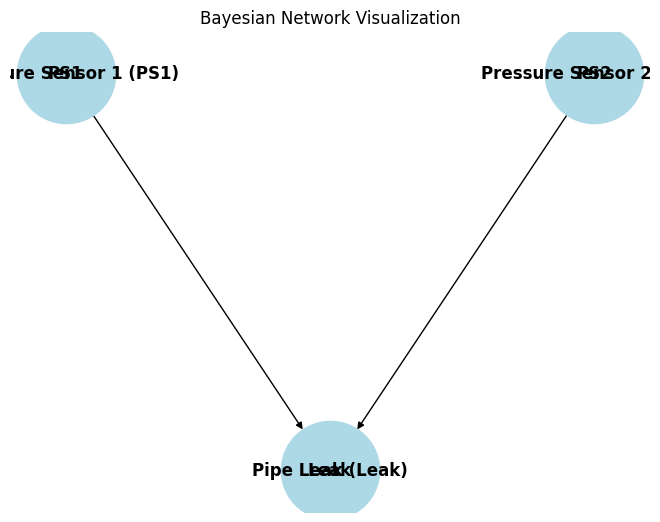

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a DiGraph (Directed Graph) to represent the Bayesian network
G = nx.DiGraph()

# Add nodes to the graph
G.add_node('PS1')
G.add_node('PS2')
G.add_node('Leak')

# Add edges to represent the conditional dependencies
G.add_edge('PS1', 'Leak')
G.add_edge('PS2', 'Leak')

# Define the layout for visualizing the graph
pos = {'PS1': (0, 1), 'PS2': (1, 1), 'Leak': (0.5, 0)}

# Draw the Bayesian network
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=12, font_color='black', font_weight='bold')
labels = {'PS1': 'Pressure Sensor 1 (PS1)', 'PS2': 'Pressure Sensor 2 (PS2)', 'Leak': 'Pipe Leak (Leak)'}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=12, font_color='black', font_weight='bold')

plt.title('Bayesian Network Visualization')
plt.axis('off')
plt.show()
